In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np



In [9]:
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names


X = X[:, [6, 2]]  # Latitude and AveRooms
print("Using features:", feature_names[6], "and", feature_names[2])

Using features: Latitude and AveRooms


In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [11]:
print("=== Linear Regression Metrics ===")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



=== Linear Regression Metrics ===
Mean Squared Error (MSE): 1.240753226244945
Mean Absolute Error (MAE): 0.8811013458074286
R² Score: 0.048469219263362784


In [12]:
print("Feature coefficients:", model.coef_)



Feature coefficients: [-0.18503203  0.19735015]


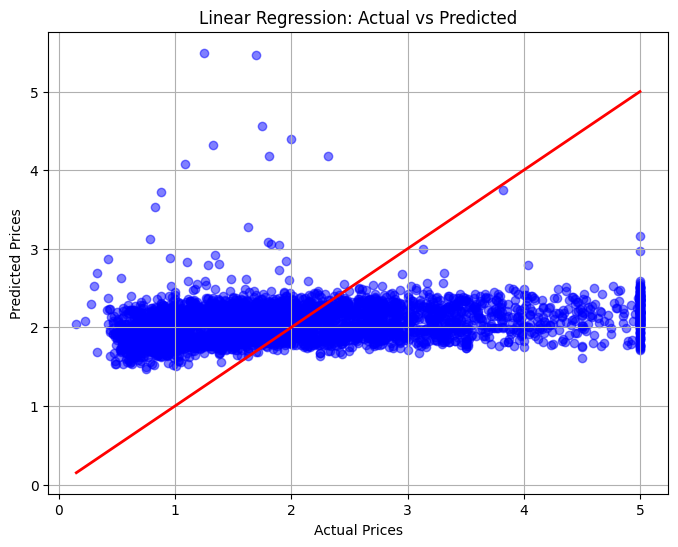

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()



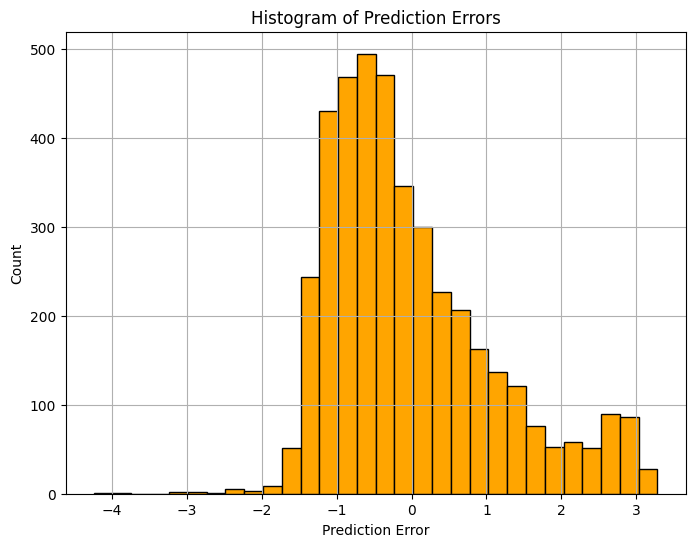

In [14]:
errors = y_test - y_pred
plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, color='orange', edgecolor='black')
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Histogram of Prediction Errors")
plt.grid(True)
plt.show()